In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
# Generate synthetic dataset (binary classification)
X, y = make_classification(
    n_samples=1000, 
    n_features=20, 
    n_informative=15, 
    n_redundant=5,
    n_classes=2,
    random_state=42
)

In [24]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Build the feedforward neural network model
model = keras.Sequential([
    layers.Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(32, activation='sigmoid'),  # Hidden layer
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [49]:
# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [51]:
# Train the model
history = model.fit(X_train, y_train,validation_split=0.2)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5242 - loss: 0.7115 - val_accuracy: 0.6750 - val_loss: 0.6656


In [52]:

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%") 


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6949 - loss: 0.6667  
Test Accuracy: 67.50%


In [53]:
# Save the model
model.save("feedforward_model.h5")

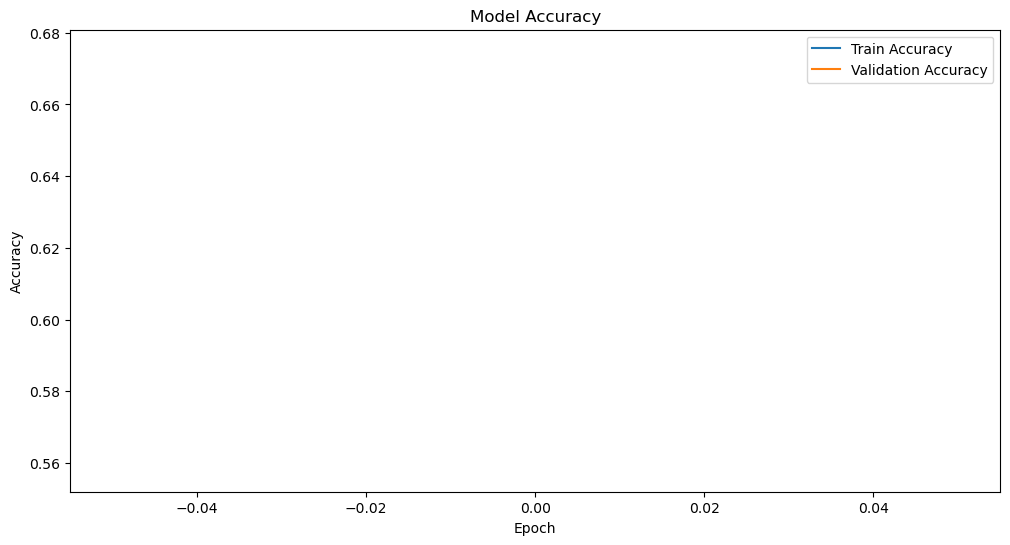

In [55]:
# Visualize training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()